In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from copy import deepcopy
from datetime import datetime
from dateutil import parser
from datetime import timedelta
import pytz
import seaborn as sns


% matplotlib inline

In [2]:
files = (['flight_details.csv','flight_details2.csv',
          'flight_details3.csv','flight_details4.csv',
          'flight_details5.csv','flight_details6.csv',
         'flight_details7.csv','flight_details8.csv',
         'flight_details9.csv','flight_details10.csv'])

In [3]:
temp = []

for file in files:
    temp.append(pd.read_csv(file))

In [4]:
df = pd.concat(temp)
len(df)

12383

In [5]:
df.iloc[2,2]

"['20170928', 'LAX', 'ORD', '09:35AM PDT', '25 minutes', '10:00AM PDT', '09:30AM PDT', '09:30AM PDT', ' ', '03:25PM CDT', '11 minutes', '03:36PM CDT', '02:57PM CDT', '03:44PM CDT', ' ', '519 mph', '37,000 ft', '1,846 mi ', ' 1,788 mi', 'RCKA2 LAS J146 DVC GLD IRK BENKY4']"

In [6]:
cols=(['Date', 'ORI', 'DES', 'Act_Gate_Dep', 'Taxi(min)', 'Act_Takeoff',
       'Sch_Dep', 'Sch_Takeoff', 'AvgDepDelay', 'Act_Landing_Arr',
       'Taxi_Arr(min)', 'Act_Gate_Arr', 'Sch_Landing_Arr', 'Sch_Gate_Arr',
       'AvgArrDelay', 'Speed(mph)', 'Altitute(ft)', 'Act_Dist(mi)',
       'Sch_Dist(mi)','Route'])

len(cols)

20

In [7]:
df.head()

,Unnamed: 0,index,0
0,0,N2437,"['20170927', 'DEN', 'PHL', ' ', ' ', '04:02PM ..."
1,1,UAL1450,"['20170929', 'LAX', 'ORD', '09:30AM PDT', '17 ..."
2,2,UAL1450,"['20170928', 'LAX', 'ORD', '09:35AM PDT', '25 ..."
3,3,UAL1450,"['20170927', 'LAX', 'ORD', '09:30AM PDT', '15 ..."
4,4,UAL1450,"['20170926', 'LAX', 'ORD', '09:01AM PDT', '16 ..."


In [8]:
df[cols] = df['0'].apply(lambda x: pd.Series(i[1:-1] for i in x.split(", ")))

In [9]:
df.drop('0',axis = 1, inplace = True)

In [10]:
df.drop(df.columns[0],axis =1, inplace = True)

In [11]:
df=df.rename(columns = {'index':'Flight#'})

In [12]:
print(df.shape)
df.head(2)

(12383, 21)


,Flight#,Date,ORI,DES,Act_Gate_Dep,Taxi(min),Act_Takeoff,Sch_Dep,Sch_Takeoff,AvgDepDelay,...,Taxi_Arr(min),Act_Gate_Arr,Sch_Landing_Arr,Sch_Gate_Arr,AvgArrDelay,Speed(mph),Altitute(ft),Act_Dist(mi),Sch_Dist(mi),Route
0,N2437,'20170927,DEN,PHL,,,04:02PM MDT,,04:00PM MDT,,...,,08:35PM EDT,,08:31PM EDT,,587 mph,"45,000 ft","1,565 mi","1,662 mi",MMYS5 ZIRKL OVR FWA JST BOJID2'
1,UAL1450,'20170929,LAX,ORD,09:30AM PDT,17 minutes,09:47AM PDT,09:23AM PDT,09:23AM PDT,,...,24 minutes,03:35PM CDT,02:54PM CDT,03:37PM CDT,,517 mph,"37,000 ft","1,833 mi","1,844 mi",SK224059 KK51A KK54C AGENT J96 IRK SHAIN1'


In [13]:
df['Date'] = df['Date'].apply(lambda x: datetime(int(x[1:5]),int(x[5:7]),int(x[7:9])))

In [14]:
flights = deepcopy(df.iloc[:,0:20])
flights.drop('AvgDepDelay', axis = 1, inplace = True)
flights.drop('AvgArrDelay', axis = 1, inplace = True)
## Decided not to work on routes right now? 

In [15]:
print(flights.shape)
flights.head()

(12383, 18)


,Flight#,Date,ORI,DES,Act_Gate_Dep,Taxi(min),Act_Takeoff,Sch_Dep,Sch_Takeoff,Act_Landing_Arr,Taxi_Arr(min),Act_Gate_Arr,Sch_Landing_Arr,Sch_Gate_Arr,Speed(mph),Altitute(ft),Act_Dist(mi),Sch_Dist(mi)
0,N2437,2017-09-27,DEN,PHL,,,04:02PM MDT,,04:00PM MDT,,,08:35PM EDT,,08:31PM EDT,587 mph,"45,000 ft","1,565 mi","1,662 mi"
1,UAL1450,2017-09-29,LAX,ORD,09:30AM PDT,17 minutes,09:47AM PDT,09:23AM PDT,09:23AM PDT,03:11PM CDT,24 minutes,03:35PM CDT,02:54PM CDT,03:37PM CDT,517 mph,"37,000 ft","1,833 mi","1,844 mi"
2,UAL1450,2017-09-28,LAX,ORD,09:35AM PDT,25 minutes,10:00AM PDT,09:30AM PDT,09:30AM PDT,03:25PM CDT,11 minutes,03:36PM CDT,02:57PM CDT,03:44PM CDT,519 mph,"37,000 ft","1,846 mi","1,788 mi"
3,UAL1450,2017-09-27,LAX,ORD,09:30AM PDT,15 minutes,09:45AM PDT,09:34AM PDT,09:34AM PDT,03:11PM CDT,15 minutes,03:26PM CDT,03:02PM CDT,03:48PM CDT,521 mph,"35,000 ft","1,900 mi","1,892 mi"
4,UAL1450,2017-09-26,LAX,ORD,09:01AM PDT,16 minutes,09:17AM PDT,09:09AM PDT,09:09AM PDT,02:41PM CDT,10 minutes,02:51PM CDT,02:38PM CDT,03:23PM CDT,520 mph,"35,000 ft","1,865 mi","1,743 mi"


In [16]:
# import re

# time_re = re.compile('^(([0]?[0-9])|([1][0-2])):([0-5]?[0-9])[AP]M')

# def time_format_check(s):
#     return bool(time_re.match(s))

In [17]:
# def check (row, col):
#     s = row[col][:7]
#     return time_format_check(s)

# for col in flights.columns:
#     try:
#         flights['test'] = (flights.apply(check, axis = 1, col = col))
#         print(col,flights[flights['test']==True].shape[0])
#     except:
#         continue
        
# # To see which time related columns definitely have infomation. 

In [18]:
# flights['test1'] = ((flights.apply(check, axis = 1, col = 'Act_Gate_Arr')) |
#                     (flights.apply(check, axis = 1, col = 'Act_Landing_Arr')))
# flights[flights['test1']==False].shape

# # finding 48 data with no actual arrival time infomation

In [19]:
# flights['test2'] = ((flights.apply(check, axis = 1, col = 'Act_Takeoff')) |
#                     (flights.apply(check, axis = 1, col = 'Act_Gate_Dep')))
# flights[flights['test2']==False].shape

# # finding 48 data with no actual arrival time infomation

In [20]:
# flights['test3'] = ((flights.apply(check, axis = 1, col = 'Sch_Takeoff')) |
#                     (flights.apply(check, axis = 1, col = 'Sch_Dep'))
#                    )
# flights[flights['test3']==False].shape

# # finding 48 data with no 

In [21]:
# flights['test4'] = ((flights.apply(check, axis = 1, col = 'Sch_Landing_Arr'))|
#                     (flights.apply(check, axis = 1, col = 'Sch_Gate_Arr'))
#                    )
# flights[flights['test4'] == False].shape

In [22]:
# flights = flights[(flights['test3'] == True) 
#                   & (flights['test3'] == True)
#                  & (flights['test2'] == True)
#                  & (flights['test1'] == True)]
# flights.shape

In [23]:
# # getting rid off rows that don't have sufficient time information
# flights.drop(['test1','test2','test3','test4',], axis = 1, inplace = True)

In [24]:
tz_dict = ({'C':'Central', 'D':'Daylight ',
            'T':'Time','S': 'Standard',
           'M':'Mountain','P':'Pacific','E':'Eastern'})

def to_time (row, col):
    if len(row[col])>10:
        t = row[col][:8]
        i_tz = row[col][8]
        if '(+1)' in row[col]:
            d = row['Date'] + timedelta(days = 1)
        else:
            d = row['Date']

        try:
            h = parser.parse(str(d)+' '+t, fuzzy = True)
            tz = pytz.timezone('US/'+ tz_dict[i_tz])
            h = tz.localize(h)
        except:
            h = np.nan
    else:
        h = np.nan

    return h


In [25]:
time_list = ['Act_Gate_Dep','Act_Takeoff','Sch_Dep',
             'Sch_Takeoff','Act_Landing_Arr','Act_Gate_Arr',
             'Sch_Landing_Arr','Sch_Gate_Arr']

for t_item in time_list:
    flights[t_item] = flights.apply(to_time, axis = 1, col = t_item)


In [26]:
flights = flights.reset_index()
flights.iloc[115:119,:]

,index,Flight#,Date,ORI,DES,Act_Gate_Dep,Taxi(min),Act_Takeoff,Sch_Dep,Sch_Takeoff,Act_Landing_Arr,Taxi_Arr(min),Act_Gate_Arr,Sch_Landing_Arr,Sch_Gate_Arr,Speed(mph),Altitute(ft),Act_Dist(mi),Sch_Dist(mi)
115,115,UAL414,2017-09-29,SFO,EWR,2017-09-29 08:59:00-07:00,21 minutes,2017-09-29 09:20:00-07:00,2017-09-29 09:05:00-07:00,2017-09-29 09:05:00-07:00,2017-09-29 17:09:00-04:00,7 minutes,2017-09-29 17:16:00-04:00,2017-09-29 16:57:00-04:00,2017-09-29 17:40:00-04:00,512 mph,"37,000 ft","2,655 mi","2,668 mi"
116,116,UAL414,2017-09-29,LAX,SFO,2017-09-29 06:31:00-07:00,1 hour 11 minutes,2017-09-29 07:42:00-07:00,2017-09-29 06:41:00-07:00,2017-09-29 06:41:00-07:00,2017-09-29 08:33:00-07:00,11 minutes,2017-09-29 08:44:00-07:00,2017-09-29 07:38:00-07:00,2017-09-29 08:10:00-07:00,499 mph,"30,000 ft",357 mi,356 mi
117,117,UAL414,2017-09-28,SFO,EWR,2017-09-28 09:16:00-07:00,32 minutes,2017-09-28 09:48:00-07:00,2017-09-28 09:05:00-07:00,2017-09-28 09:05:00-07:00,2017-09-28 17:30:00-04:00,14 minutes,2017-09-28 17:44:00-04:00,2017-09-28 16:49:00-04:00,2017-09-28 17:40:00-04:00,512 mph,"37,000 ft","2,633 mi","2,651 mi"
118,118,UAL414,2017-09-28,LAX,SFO,2017-09-28 06:21:00-07:00,29 minutes,2017-09-28 06:50:00-07:00,2017-09-28 06:31:00-07:00,2017-09-28 06:31:00-07:00,2017-09-28 07:42:00-07:00,4 minutes,2017-09-28 07:46:00-07:00,2017-09-28 07:26:00-07:00,2017-09-28 08:00:00-07:00,495 mph,"32,000 ft",357 mi,353 mi


In [27]:
## look into the units of some columns 

unit_list = ['Taxi(min)','Taxi_Arr(min)','Speed(mph)','Altitute(ft)','Act_Dist(mi)','Sch_Dist(mi)']

# def get_unit (row, col):
#     x = row[col]
#     try:
#         y = x[x.strip().index(' ')+1:]
#     except:
#         y = ''
#     return y


In [28]:
# unit_list = ['Taxi','Taxi_Arr','Speed','Altitute','Act_Dist','Sch_Dist']

def convert_unit (row, col):
    x = row[col].strip()
    if 'hour' in [x_i.strip() for x_i in x.split()]:
        hour = x[:x.index(' hour')]
        if 'minutes' in [x_i.strip() for x_i in x.split()]:
            minute = x[x.index(' hour')+5 : x.index(' minutes')]
            y = int(hour)*60 + int(minute)

        else:
            y = int(hour)
    try:
        y = int(x[:x.index(' ')].strip().replace(',', ''))

    except:
        y = np.nan

    return y

for u in unit_list:
    flights[u] = flights.apply(convert_unit, axis = 1, col = u)

In [29]:
flights.head()
flights.shape

(12383, 19)

In [30]:
flights.drop('index', axis = 1, inplace = True)

In [31]:
# check if flights have enough information for sch_departure, sch_arrival, actual_departure, and actual arrival

def check_times (row, cols):
    for i in [0,2,4,6]:
        if str(row[cols[i]]) == 'nan' and str(row[cols[i+1]]) == 'nan':           
            return False
    return True
        

In [32]:
flights['Check'] = flights.apply(check_times, axis = 1, cols = time_list)

In [33]:
flights = flights[flights['Check'] == True]
flights.head()

,Flight#,Date,ORI,DES,Act_Gate_Dep,Taxi(min),Act_Takeoff,Sch_Dep,Sch_Takeoff,Act_Landing_Arr,Taxi_Arr(min),Act_Gate_Arr,Sch_Landing_Arr,Sch_Gate_Arr,Speed(mph),Altitute(ft),Act_Dist(mi),Sch_Dist(mi),Check
0,N2437,2017-09-27,DEN,PHL,NaN,NaN,2017-09-27 16:02:00-06:00,NaN,2017-09-27 16:00:00-06:00,NaN,NaN,2017-09-27 20:35:00-04:00,NaN,2017-09-27 20:31:00-04:00,587.0,45000.0,1565.0,1662.0,True
1,UAL1450,2017-09-29,LAX,ORD,2017-09-29 09:30:00-07:00,17.0,2017-09-29 09:47:00-07:00,2017-09-29 09:23:00-07:00,2017-09-29 09:23:00-07:00,2017-09-29 15:11:00-05:00,24.0,2017-09-29 15:35:00-05:00,2017-09-29 14:54:00-05:00,2017-09-29 15:37:00-05:00,517.0,37000.0,1833.0,1844.0,True
2,UAL1450,2017-09-28,LAX,ORD,2017-09-28 09:35:00-07:00,25.0,2017-09-28 10:00:00-07:00,2017-09-28 09:30:00-07:00,2017-09-28 09:30:00-07:00,2017-09-28 15:25:00-05:00,11.0,2017-09-28 15:36:00-05:00,2017-09-28 14:57:00-05:00,2017-09-28 15:44:00-05:00,519.0,37000.0,1846.0,1788.0,True
3,UAL1450,2017-09-27,LAX,ORD,2017-09-27 09:30:00-07:00,15.0,2017-09-27 09:45:00-07:00,2017-09-27 09:34:00-07:00,2017-09-27 09:34:00-07:00,2017-09-27 15:11:00-05:00,15.0,2017-09-27 15:26:00-05:00,2017-09-27 15:02:00-05:00,2017-09-27 15:48:00-05:00,521.0,35000.0,1900.0,1892.0,True
4,UAL1450,2017-09-26,LAX,ORD,2017-09-26 09:01:00-07:00,16.0,2017-09-26 09:17:00-07:00,2017-09-26 09:09:00-07:00,2017-09-26 09:09:00-07:00,2017-09-26 14:41:00-05:00,10.0,2017-09-26 14:51:00-05:00,2017-09-26 14:38:00-05:00,2017-09-26 15:23:00-05:00,520.0,35000.0,1865.0,1743.0,True


In [34]:
# new_name ={'Taxi':'Taxi(min)','Taxi_Arr':'Taxi_Arr(min)',
#                           'Speed':'Speed(mph)','Altitute': 'Altitute(ft)',
#                           'Act_Dist':'Act_Dist(mi)','Sch_Dist':'Sch_Dist(mi)'}


In [35]:
flights.drop_duplicates(inplace = True)
flights = flights[flights['ORI'] != flights['DES']]
flights = flights[(flights['Act_Dist(mi)']>50) & (flights['Sch_Dist(mi)']>50)]
flights = flights.reset_index()
flights.drop('index',axis = 1, inplace = True)
flights.shape

(12199, 19)

In [36]:
flights.to_csv('flights1to10_clean.csv')

In [37]:
flights.head()

,Flight#,Date,ORI,DES,Act_Gate_Dep,Taxi(min),Act_Takeoff,Sch_Dep,Sch_Takeoff,Act_Landing_Arr,Taxi_Arr(min),Act_Gate_Arr,Sch_Landing_Arr,Sch_Gate_Arr,Speed(mph),Altitute(ft),Act_Dist(mi),Sch_Dist(mi),Check
0,N2437,2017-09-27,DEN,PHL,NaN,NaN,2017-09-27 16:02:00-06:00,NaN,2017-09-27 16:00:00-06:00,NaN,NaN,2017-09-27 20:35:00-04:00,NaN,2017-09-27 20:31:00-04:00,587.0,45000.0,1565.0,1662.0,True
1,UAL1450,2017-09-29,LAX,ORD,2017-09-29 09:30:00-07:00,17.0,2017-09-29 09:47:00-07:00,2017-09-29 09:23:00-07:00,2017-09-29 09:23:00-07:00,2017-09-29 15:11:00-05:00,24.0,2017-09-29 15:35:00-05:00,2017-09-29 14:54:00-05:00,2017-09-29 15:37:00-05:00,517.0,37000.0,1833.0,1844.0,True
2,UAL1450,2017-09-28,LAX,ORD,2017-09-28 09:35:00-07:00,25.0,2017-09-28 10:00:00-07:00,2017-09-28 09:30:00-07:00,2017-09-28 09:30:00-07:00,2017-09-28 15:25:00-05:00,11.0,2017-09-28 15:36:00-05:00,2017-09-28 14:57:00-05:00,2017-09-28 15:44:00-05:00,519.0,37000.0,1846.0,1788.0,True
3,UAL1450,2017-09-27,LAX,ORD,2017-09-27 09:30:00-07:00,15.0,2017-09-27 09:45:00-07:00,2017-09-27 09:34:00-07:00,2017-09-27 09:34:00-07:00,2017-09-27 15:11:00-05:00,15.0,2017-09-27 15:26:00-05:00,2017-09-27 15:02:00-05:00,2017-09-27 15:48:00-05:00,521.0,35000.0,1900.0,1892.0,True
4,UAL1450,2017-09-26,LAX,ORD,2017-09-26 09:01:00-07:00,16.0,2017-09-26 09:17:00-07:00,2017-09-26 09:09:00-07:00,2017-09-26 09:09:00-07:00,2017-09-26 14:41:00-05:00,10.0,2017-09-26 14:51:00-05:00,2017-09-26 14:38:00-05:00,2017-09-26 15:23:00-05:00,520.0,35000.0,1865.0,1743.0,True


In [38]:
## Duration check

def get_duration (row, dep1, dep2, arr1, arr2):
    if str(row[dep1]) != 'nan':
        if str(row[arr2]) != 'nan':
            dur = row[arr2] - row[dep1]
        else:
            dur = row[arr1] - row[dep1]
    else:
        if str(row[arr2]) != 'nan':
            dur = row[arr2] - row[dep2]
        else:
            dur = row[arr1] - row[dep2]
    return (dur.total_seconds()/60.0)

In [39]:
flights['Act_Dur'] = flights.apply(get_duration, axis = 1, dep1 = 'Act_Gate_Dep', 
                                   dep2 = 'Act_Takeoff', arr1 = 'Act_Landing_Arr', arr2 = 'Act_Gate_Arr')

In [40]:
flights['Sch_Dur'] = flights.apply(get_duration, axis = 1, dep1 = 'Sch_Dep', 
                                   dep2 = 'Sch_Takeoff', arr1 = 'Sch_Landing_Arr', arr2 = 'Sch_Gate_Arr')

In [41]:
flights['Delay_Arr'] = flights.apply(get_duration, axis = 1, dep1 = 'Sch_Gate_Arr', 
                                   dep2 = 'Sch_Landing_Arr', arr1 = 'Act_Landing_Arr', arr2 = 'Act_Gate_Arr')

In [42]:
flights['Delay_Dep'] = flights.apply(get_duration, axis = 1, dep1 = 'Sch_Dep', 
                                   dep2 = 'Sch_Takeoff', arr1 = 'Act_Takeoff', arr2 = 'Act_Gate_Dep')

# CHANGE TO DUMMY VARIABLES!!!!!

In [43]:
def to_TOD (row, col1, col2):
    if str(row[col1]) != 'nan':
        d = row[col1]
    else:
        d = row[col2]
    TOD = d.hour + d.minute / 60. + d.second / 3600.
    return TOD

In [44]:
flights['Dep_Hr'] = flights.apply(to_TOD, axis = 1, col1 = 'Sch_Dep', col2 = 'Sch_Takeoff' )

In [45]:
flights['DOW'] = flights['Date'].apply(lambda x: x.weekday())

In [46]:
airport_list = (['ATL', 'ORD', 'LAX', 'DFW', 'JFK', 'DEN', 'SFO'
                 , 'LAS', 'CLT', 'MIA', 'PHX', 'IAH', 'SEA', 'MCO'
                 , 'EWR', 'MSP', 'BOS', 'DTW', 'PHL', 'LGA'])

flights['ORI_rank'] = flights['ORI'].apply(lambda x: airport_list.index(x))
flights['DES_rank'] = flights['DES'].apply(lambda x: airport_list.index(x))

In [47]:
check_cols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,18,19,20,21,22,23]
flights.iloc[:,check_cols].head(3)

,Flight#,Date,ORI,DES,Act_Gate_Dep,Taxi(min),Act_Takeoff,Sch_Dep,Sch_Takeoff,Act_Landing_Arr,Taxi_Arr(min),Act_Gate_Arr,Sch_Landing_Arr,Sch_Gate_Arr,Check,Act_Dur,Sch_Dur,Delay_Arr,Delay_Dep,Dep_Hr
0,N2437,2017-09-27,DEN,PHL,NaN,NaN,2017-09-27 16:02:00-06:00,NaN,2017-09-27 16:00:00-06:00,NaN,NaN,2017-09-27 20:35:00-04:00,NaN,2017-09-27 20:31:00-04:00,True,153.0,151.0,4.0,2.0,16.000000
1,UAL1450,2017-09-29,LAX,ORD,2017-09-29 09:30:00-07:00,17.0,2017-09-29 09:47:00-07:00,2017-09-29 09:23:00-07:00,2017-09-29 09:23:00-07:00,2017-09-29 15:11:00-05:00,24.0,2017-09-29 15:35:00-05:00,2017-09-29 14:54:00-05:00,2017-09-29 15:37:00-05:00,True,245.0,254.0,-2.0,7.0,9.383333
2,UAL1450,2017-09-28,LAX,ORD,2017-09-28 09:35:00-07:00,25.0,2017-09-28 10:00:00-07:00,2017-09-28 09:30:00-07:00,2017-09-28 09:30:00-07:00,2017-09-28 15:25:00-05:00,11.0,2017-09-28 15:36:00-05:00,2017-09-28 14:57:00-05:00,2017-09-28 15:44:00-05:00,True,241.0,254.0,-8.0,5.0,9.500000


In [48]:
flights.describe()

,Taxi(min),Taxi_Arr(min),Speed(mph),Altitute(ft),Act_Dist(mi),Sch_Dist(mi),Act_Dur,Sch_Dur,Delay_Arr,Delay_Dep,Dep_Hr,DOW,ORI_rank,DES_rank
count,11547.000000,11543.000000,12196.000000,12154.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000
mean,18.759764,9.222386,518.477616,33587.337502,1165.734732,1177.492745,171.584474,179.105173,-3.482826,4.037872,13.129486,2.683007,8.449053,8.383966
std,7.923360,5.840010,27.174399,4658.126637,663.752380,657.274611,81.916933,80.740105,72.141245,67.368885,4.886104,1.819832,5.945440,6.085899
min,1.000000,1.000000,71.000000,6000.000000,84.000000,87.000000,-16.000000,-15.000000,-1467.000000,-1439.000000,0.250000,0.000000,0.000000,0.000000
25%,13.000000,6.000000,514.000000,32000.000000,699.000000,713.000000,114.000000,121.000000,-17.000000,-6.000000,9.000000,1.000000,3.000000,3.000000
50%,17.000000,8.000000,522.000000,35000.000000,1008.000000,1021.000000,155.000000,162.000000,-8.000000,-3.000000,13.000000,3.000000,7.000000,7.000000
75%,22.000000,11.000000,529.000000,36000.000000,1571.000000,1581.000000,220.000000,228.000000,4.000000,5.000000,17.000000,4.000000,14.000000,14.000000
max,59.000000,59.000000,606.000000,45000.000000,5599.000000,2987.000000,1344.000000,405.000000,1447.000000,543.000000,23.983333,6.000000,19.000000,19.000000


In [49]:
# get_rid of flights that have weird durations
flights[(flights['Act_Dur']<0) | (flights['Sch_Dur']<0)].iloc[:,check_cols]
# flights.iloc[1417,:]

,Flight#,Date,ORI,DES,Act_Gate_Dep,Taxi(min),Act_Takeoff,Sch_Dep,Sch_Takeoff,Act_Landing_Arr,Taxi_Arr(min),Act_Gate_Arr,Sch_Landing_Arr,Sch_Gate_Arr,Check,Act_Dur,Sch_Dur,Delay_Arr,Delay_Dep,Dep_Hr
1393,N800PZ,2017-09-18,LAS,PHX,NaN,NaN,2017-09-18 09:20:00-07:00,NaN,2017-09-18 08:36:00-07:00,NaN,NaN,2017-09-18 10:08:00-06:00,NaN,2017-09-18 09:21:00-06:00,True,-12.0,-15.0,47.0,44.0,8.600000
1395,N800PZ,2017-09-17,LAS,PHX,NaN,NaN,2017-09-17 15:55:00-07:00,NaN,2017-09-17 13:45:00-07:00,NaN,NaN,2017-09-17 16:47:00-06:00,NaN,2017-09-17 14:35:00-06:00,True,-8.0,-10.0,132.0,130.0,13.750000
4492,N660JM,2017-09-29,LAS,PHX,NaN,NaN,2017-09-29 16:18:00-07:00,NaN,2017-09-29 08:30:00-07:00,NaN,NaN,2017-09-29 17:02:00-06:00,NaN,2017-09-29 09:17:00-06:00,True,-16.0,-13.0,465.0,468.0,8.500000
6304,SWA1253,2017-09-26,LAS,PHX,2017-09-26 10:37:00-07:00,8.0,2017-09-26 10:45:00-07:00,2017-09-26 10:40:00-07:00,2017-09-26 10:40:00-07:00,2017-09-26 11:30:00-06:00,5.0,2017-09-26 11:35:00-06:00,2017-09-26 11:40:00-06:00,2017-09-26 11:50:00-06:00,True,-2.0,10.0,-15.0,-3.0,10.666667
6308,SWA1253,2017-09-20,LAS,PHX,2017-09-20 10:36:00-07:00,11.0,2017-09-20 10:47:00-07:00,2017-09-20 10:40:00-07:00,2017-09-20 10:40:00-07:00,2017-09-20 11:30:00-06:00,5.0,2017-09-20 11:35:00-06:00,2017-09-20 11:24:00-06:00,2017-09-20 11:50:00-06:00,True,-1.0,10.0,-15.0,-4.0,10.666667
7805,SWA4826,2017-09-25,LAS,PHX,2017-09-25 21:30:00-07:00,11.0,2017-09-25 21:41:00-07:00,2017-09-25 21:25:00-07:00,2017-09-25 21:25:00-07:00,2017-09-25 22:22:00-06:00,5.0,2017-09-25 22:27:00-06:00,2017-09-25 22:30:00-06:00,2017-09-25 22:30:00-06:00,True,-3.0,5.0,-3.0,5.0,21.416667
8261,SWA1885,2017-09-20,LAS,PHX,2017-09-20 07:23:00-07:00,9.0,2017-09-20 07:32:00-07:00,2017-09-20 07:25:00-07:00,2017-09-20 07:25:00-07:00,2017-09-20 08:16:00-06:00,5.0,2017-09-20 08:21:00-06:00,2017-09-20 08:20:00-06:00,2017-09-20 08:30:00-06:00,True,-2.0,5.0,-9.0,-2.0,7.416667
8392,SWA625,2017-09-29,LAS,PHX,2017-09-29 05:54:00-07:00,10.0,2017-09-29 06:04:00-07:00,2017-09-29 05:45:00-07:00,2017-09-29 05:45:00-07:00,2017-09-29 06:47:00-06:00,3.0,2017-09-29 06:50:00-06:00,2017-09-29 06:30:00-06:00,2017-09-29 06:55:00-06:00,True,-4.0,10.0,-5.0,9.0,5.750000
8395,SWA625,2017-09-25,LAS,PHX,2017-09-25 05:45:00-07:00,10.0,2017-09-25 05:55:00-07:00,2017-09-25 05:45:00-07:00,2017-09-25 05:45:00-07:00,2017-09-25 06:36:00-06:00,4.0,2017-09-25 06:40:00-06:00,2017-09-25 06:36:00-06:00,2017-09-25 06:55:00-06:00,True,-5.0,10.0,-15.0,0.0,5.750000
8396,SWA625,2017-09-22,LAS,PHX,2017-09-22 05:44:00-07:00,3.0,2017-09-22 05:47:00-07:00,2017-09-22 05:45:00-07:00,2017-09-22 05:45:00-07:00,2017-09-22 06:31:00-06:00,3.0,2017-09-22 06:34:00-06:00,2017-09-22 06:30:00-06:00,2017-09-22 06:55:00-06:00,True,-10.0,10.0,-21.0,-1.0,5.750000


In [50]:
# The flights that have negative durations seem to all be going to PHX 
# - there might be a mess up of phoenix's time zone
flights = flights[(flights['Act_Dur']>0) | (flights['Sch_Dur']>0)]
flights.shape

(12190, 27)

### QTR8185, NKS422 was correct, UAL549 as well as a other large negative delay values were actually wrong by at least a day. Add a day (1440 mins)

In [51]:
print(flights[(flights['Delay_Dep'])<-60].shape)
flights[(flights['Delay_Dep'])<-60].iloc[:,check_cols].sort_values('Delay_Dep', ascending = False)

(27, 27)


,Flight#,Date,ORI,DES,Act_Gate_Dep,Taxi(min),Act_Takeoff,Sch_Dep,Sch_Takeoff,Act_Landing_Arr,Taxi_Arr(min),Act_Gate_Arr,Sch_Landing_Arr,Sch_Gate_Arr,Check,Act_Dur,Sch_Dur,Delay_Arr,Delay_Dep,Dep_Hr
9707,QTR8185,2017-09-27,JFK,LAX,2017-09-27 00:14:00-04:00,NaN,2017-09-27 00:14:00-04:00,2017-09-27 01:40:00-04:00,2017-09-27 01:40:00-04:00,2017-09-27 02:45:00-07:00,NaN,NaN,2017-09-27 04:11:00-07:00,2017-09-27 00:40:00-07:00,True,331.0,120.0,125.0,-86.0,1.666667
4334,UAL549,2017-09-24,PHL,ORD,2017-09-24 07:07:00-04:00,17.0,2017-09-24 07:24:00-04:00,2017-09-24 09:59:00-04:00,2017-09-24 09:59:00-04:00,2017-09-24 07:54:00-05:00,5.0,2017-09-24 07:59:00-05:00,2017-09-24 10:40:00-05:00,2017-09-24 11:18:00-05:00,True,112.0,139.0,-199.0,-172.0,9.983333
2189,NKS422,2017-09-21,MCO,BOS,2017-09-21 14:33:00-04:00,NaN,2017-09-21 14:33:00-04:00,2017-09-21 18:15:00-04:00,2017-09-21 18:24:00-04:00,2017-09-21 17:05:00-04:00,NaN,NaN,2017-09-21 20:50:00-04:00,2017-09-21 21:24:00-04:00,True,152.0,189.0,-259.0,-222.0,18.250000
1766,DAL748,2017-09-26,MSP,CLT,2017-09-26 05:38:00-05:00,20.0,2017-09-26 05:58:00-05:00,2017-09-26 20:15:00-05:00,2017-09-26 20:15:00-05:00,2017-09-26 08:59:00-04:00,6.0,2017-09-26 09:05:00-04:00,2017-09-26 23:18:00-04:00,2017-09-26 23:59:00-04:00,True,147.0,164.0,-894.0,-877.0,20.250000
3135,VRD1948,2017-09-22,SFO,LAX,2017-09-22 02:50:00-07:00,14.0,2017-09-22 03:04:00-07:00,2017-09-22 21:00:00-07:00,2017-09-22 21:00:00-07:00,2017-09-22 03:51:00-07:00,4.0,2017-09-22 03:55:00-07:00,2017-09-22 21:54:00-07:00,2017-09-22 22:33:00-07:00,True,65.0,93.0,-1118.0,-1090.0,21.000000
7763,DAL1282,2017-09-19,MIA,JFK,2017-09-19 00:53:00-04:00,13.0,2017-09-19 01:06:00-04:00,2017-09-19 19:45:00-04:00,2017-09-19 19:45:00-04:00,2017-09-19 03:21:00-04:00,6.0,2017-09-19 03:27:00-04:00,2017-09-19 22:07:00-04:00,2017-09-19 22:56:00-04:00,True,154.0,191.0,-1169.0,-1132.0,19.750000
55,DAL442,2017-09-19,JFK,BOS,2017-09-19 00:17:00-04:00,17.0,2017-09-19 00:34:00-04:00,2017-09-19 19:24:00-04:00,2017-09-19 19:24:00-04:00,2017-09-19 01:09:00-04:00,8.0,2017-09-19 01:17:00-04:00,2017-09-19 20:15:00-04:00,2017-09-19 21:03:00-04:00,True,60.0,99.0,-1186.0,-1147.0,19.400000
8608,JBU997,2017-09-19,BOS,ATL,2017-09-19 00:35:00-04:00,14.0,2017-09-19 00:49:00-04:00,2017-09-19 21:02:00-04:00,2017-09-19 21:02:00-04:00,2017-09-19 02:51:00-04:00,6.0,2017-09-19 02:57:00-04:00,2017-09-19 23:16:00-04:00,2017-09-19 23:52:00-04:00,True,142.0,170.0,-1255.0,-1227.0,21.033333
9506,JBU1323,2017-09-20,JFK,LAX,2017-09-20 01:10:00-04:00,22.0,2017-09-20 01:32:00-04:00,2017-09-20 21:43:00-04:00,2017-09-20 21:43:00-04:00,2017-09-20 03:48:00-07:00,6.0,2017-09-20 03:54:00-07:00,2017-09-21 00:36:00-07:00,2017-09-21 00:59:00-07:00,True,344.0,376.0,-1265.0,-1233.0,21.716667
3972,DAL2374,2017-09-26,LAS,ATL,2017-09-26 01:32:00-07:00,NaN,2017-09-26 01:32:00-07:00,2017-09-26 23:45:00-07:00,2017-09-26 23:45:00-07:00,2017-09-26 07:56:00-04:00,7.0,2017-09-26 08:03:00-04:00,2017-09-27 06:00:00-04:00,2017-09-27 06:32:00-04:00,True,211.0,227.0,-1349.0,-1333.0,23.750000


In [52]:
flights['Delay_Dep']= flights['Delay_Dep'].apply(lambda x: x + 60*24 if x < -500 else x)
flights['Delay_Arr']= flights['Delay_Arr'].apply(lambda x: x + 60*24 if x < -500 else x)

# CHECKED THE FLIGHT STATUS, THIS RECORD WAS CORRECT, IT WAS DELAYED THAT MUCH  ¯\_(ツ)_/¯  should it be dropped?

In [53]:
flights.loc[4334,['Delay_Arr']] = 1440-199
flights.loc[4334,['Delay_Dep']] = -172 + 1440

In [54]:
flights[(flights['Delay_Arr'])>1000].iloc[:,check_cols]

,Flight#,Date,ORI,DES,Act_Gate_Dep,Taxi(min),Act_Takeoff,Sch_Dep,Sch_Takeoff,Act_Landing_Arr,Taxi_Arr(min),Act_Gate_Arr,Sch_Landing_Arr,Sch_Gate_Arr,Check,Act_Dur,Sch_Dur,Delay_Arr,Delay_Dep,Dep_Hr
4334,UAL549,2017-09-24,PHL,ORD,2017-09-24 07:07:00-04:00,17.0,2017-09-24 07:24:00-04:00,2017-09-24 09:59:00-04:00,2017-09-24 09:59:00-04:00,2017-09-24 07:54:00-05:00,5.0,2017-09-24 07:59:00-05:00,2017-09-24 10:40:00-05:00,2017-09-24 11:18:00-05:00,True,112.0,139.0,1241.0,1268.0,9.983333
4742,SKW3087,2017-09-20,ORD,IAH,2017-09-20 17:42:00-05:00,10.0,2017-09-20 17:52:00-05:00,2017-09-20 13:15:00-05:00,2017-09-20 13:15:00-05:00,2017-09-21 15:56:00-05:00,10.0,2017-09-21 16:06:00-05:00,2017-09-20 14:58:00-05:00,2017-09-20 15:59:00-05:00,True,1344.0,164.0,1447.0,267.0,13.250000
11528,DAL2237,2017-09-20,JFK,ATL,2017-09-20 23:10:00-04:00,10.0,2017-09-20 23:20:00-04:00,2017-09-20 17:00:00-04:00,2017-09-20 17:00:00-04:00,2017-09-21 19:14:00-04:00,9.0,2017-09-21 19:23:00-04:00,2017-09-20 18:49:00-04:00,2017-09-20 19:42:00-04:00,True,1213.0,162.0,1421.0,370.0,17.000000


In [69]:
# flights.drop([4742,11528], axis = 0, inplace = True)

In [70]:
flights.describe()

,Taxi(min),Taxi_Arr(min),Speed(mph),Altitute(ft),Act_Dist(mi),Sch_Dist(mi),Act_Dur,Sch_Dur,Delay_Arr,Delay_Dep,Dep_Hr,DOW,ORI_rank,DES_rank
count,11545.000000,11541.000000,12185.000000,12143.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000
mean,18.761282,9.222338,518.489044,33589.187186,1166.077863,1178.122251,171.535199,179.246390,-0.843863,6.867329,13.134148,2.683049,8.453561,8.383246
std,7.923207,5.840511,27.181980,4658.462988,663.421456,657.211750,80.566229,80.614926,37.425674,33.314946,4.883998,1.820054,5.945837,6.087966
min,1.000000,1.000000,71.000000,6000.000000,84.000000,87.000000,-10.000000,-6.000000,-259.000000,-222.000000,0.250000,0.000000,0.000000,0.000000
25%,13.000000,6.000000,514.000000,32000.000000,700.000000,715.000000,115.000000,121.000000,-17.000000,-6.000000,9.000000,1.000000,3.000000,3.000000
50%,17.000000,8.000000,522.000000,35000.000000,1008.000000,1022.000000,156.000000,162.000000,-8.000000,-3.000000,13.000000,3.000000,7.000000,7.000000
75%,22.000000,11.000000,529.000000,36000.000000,1571.250000,1582.250000,220.000000,229.000000,4.000000,5.000000,17.000000,4.000000,14.000000,14.000000
max,59.000000,59.000000,606.000000,45000.000000,5599.000000,2987.000000,1084.000000,405.000000,1241.000000,1268.000000,23.983333,6.000000,19.000000,19.000000


In [71]:
list(zip(range(0,flights.shape[1]), flights.columns,flights.dtypes))

[(0, 'Flight#', dtype('O')),
 (1, 'Date', dtype('<M8[ns]')),
 (2, 'ORI', dtype('O')),
 (3, 'DES', dtype('O')),
 (4, 'Act_Gate_Dep', dtype('O')),
 (5, 'Taxi(min)', dtype('float64')),
 (6, 'Act_Takeoff', dtype('O')),
 (7, 'Sch_Dep', dtype('O')),
 (8, 'Sch_Takeoff', dtype('O')),
 (9, 'Act_Landing_Arr', dtype('O')),
 (10, 'Taxi_Arr(min)', dtype('float64')),
 (11, 'Act_Gate_Arr', dtype('O')),
 (12, 'Sch_Landing_Arr', dtype('O')),
 (13, 'Sch_Gate_Arr', dtype('O')),
 (14, 'Speed(mph)', dtype('float64')),
 (15, 'Altitute(ft)', dtype('float64')),
 (16, 'Act_Dist(mi)', dtype('float64')),
 (17, 'Sch_Dist(mi)', dtype('float64')),
 (18, 'Check', dtype('bool')),
 (19, 'Act_Dur', dtype('float64')),
 (20, 'Sch_Dur', dtype('float64')),
 (21, 'Delay_Arr', dtype('float64')),
 (22, 'Delay_Dep', dtype('float64')),
 (23, 'Dep_Hr', dtype('float64')),
 (24, 'DOW', dtype('int64')),
 (25, 'ORI_rank', dtype('int64')),
 (26, 'DES_rank', dtype('int64'))]

In [72]:
sm_flights = flights.iloc[:,[0,5,10,14,15,16,17,19,20,23,24,25,26,22,21]]
sm_flights.head()

,Flight#,Taxi(min),Taxi_Arr(min),Speed(mph),Altitute(ft),Act_Dist(mi),Sch_Dist(mi),Act_Dur,Sch_Dur,Dep_Hr,DOW,ORI_rank,DES_rank,Delay_Dep,Delay_Arr
0,N2437,NaN,NaN,587.0,45000.0,1565.0,1662.0,153.0,151.0,16.000000,2,5,18,2.0,4.0
1,UAL1450,17.0,24.0,517.0,37000.0,1833.0,1844.0,245.0,254.0,9.383333,4,2,1,7.0,-2.0
2,UAL1450,25.0,11.0,519.0,37000.0,1846.0,1788.0,241.0,254.0,9.500000,3,2,1,5.0,-8.0
3,UAL1450,15.0,15.0,521.0,35000.0,1900.0,1892.0,236.0,254.0,9.566667,2,2,1,-4.0,-22.0
4,UAL1450,16.0,10.0,520.0,35000.0,1865.0,1743.0,230.0,254.0,9.150000,1,2,1,-8.0,-32.0


In [73]:
airlines = sm_flights['Flight#'].map(lambda x: x[0:3]).value_counts().index[0:6]
airlines

Index(['AAL', 'DAL', 'UAL', 'SWA', 'JBU', 'VRD'], dtype='object')

In [74]:
sm_flights['Airline'] = sm_flights['Flight#'].map(lambda x: x[0:3])

/Users/Chuoran/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
# These are 6 new features for linear reg etc
sm_flights[airlines] = pd.get_dummies(sm_flights.Airline).loc[:, airlines]

/Users/Chuoran/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [76]:
sm_flights.head()

,Flight#,Taxi(min),Taxi_Arr(min),Speed(mph),Altitute(ft),Act_Dist(mi),Sch_Dist(mi),Act_Dur,Sch_Dur,Dep_Hr,...,DES_rank,Delay_Dep,Delay_Arr,Airline,AAL,DAL,UAL,SWA,JBU,VRD
0,N2437,NaN,NaN,587.0,45000.0,1565.0,1662.0,153.0,151.0,16.000000,...,18,2.0,4.0,N24,0,0,0,0,0,0
1,UAL1450,17.0,24.0,517.0,37000.0,1833.0,1844.0,245.0,254.0,9.383333,...,1,7.0,-2.0,UAL,0,0,1,0,0,0
2,UAL1450,25.0,11.0,519.0,37000.0,1846.0,1788.0,241.0,254.0,9.500000,...,1,5.0,-8.0,UAL,0,0,1,0,0,0
3,UAL1450,15.0,15.0,521.0,35000.0,1900.0,1892.0,236.0,254.0,9.566667,...,1,-4.0,-22.0,UAL,0,0,1,0,0,0
4,UAL1450,16.0,10.0,520.0,35000.0,1865.0,1743.0,230.0,254.0,9.150000,...,1,-8.0,-32.0,UAL,0,0,1,0,0,0


In [149]:
test = sm_flights.groupby('Airline')['Delay_Arr'].mean().loc[airlines].sort_values().reset_index()
# al_delay_dict

In [150]:
test

,index,Delay_Arr
0,DAL,-4.134888
1,UAL,-2.726073
2,AAL,-0.632399
3,JBU,0.358238
4,VRD,2.613793
5,SWA,2.934722


In [152]:
# This is 1 feature for Trees
sm_flights['Airline_Avg_Delay'] = (sm_flights.Airline.map({'DAL':1,'UAL':2,'AAL':3,'JBU':4,'VRD':5,'SWA':6})
                                   .fillna(0))

In [154]:
# Trying to find grouping of DOW to make dummy varieble
(sm_flights.groupby('DOW')['Delay_Dep','Delay_Arr','Flight#']
 .agg({'Delay_Dep': 'mean','Delay_Arr':'mean','Flight#':'count'})
 .sort_values('Delay_Arr').iloc[:,1].reset_index())

# Deciding it's not obvious enough on how to group
# Keeping these values as 

,DOW,Delay_Arr
0,5,-6.426036
1,2,-2.206037
2,3,-1.256387
3,6,-1.103004
4,4,-0.539341
5,0,0.957583
6,1,1.666165


In [155]:
DOW_ls = ['Mon','Tue','Wed','Thu','Fri','Sat']
sm_flights[DOW_ls] = pd.get_dummies(sm_flights.DOW).loc[:, [0,1,2,3,4,5]]

In [156]:
# This is 1 feature for Trees
sm_flights['DOW_avg_delay'] = sm_flights.DOW.map({0:5,1:6,2:1,3:2,4:4,5:0,6:1})

In [157]:
print(sm_flights.shape)
sm_flights.columns

(12188, 30)


Index(['Flight#', 'Taxi(min)', 'Taxi_Arr(min)', 'Speed(mph)', 'Altitute(ft)',
       'Act_Dist(mi)', 'Sch_Dist(mi)', 'Act_Dur', 'Sch_Dur', 'Dep_Hr', 'DOW',
       'ORI_rank', 'DES_rank', 'Delay_Dep', 'Delay_Arr', 'Airline', 'AAL',
       'DAL', 'UAL', 'SWA', 'JBU', 'VRD', 'Airline_Avg_Delay', 'Mon', 'Tue',
       'Wed', 'Thu', 'Fri', 'Sat', 'DOW_avg_delay'],
      dtype='object')

In [160]:
sm_flights['TOD_temp'] = sm_flights.Dep_Hr.astype(int)

          Delay_Dep  Delay_Arr  Flight#  Airline
TOD_temp                                        
0          1.481481  -9.037037       54        4
1          6.250000   4.428571       28        8
2          0.000000  -8.000000        2        2
3          3.100000 -14.450000       20        3
4         40.928571  42.142857       14        5
5          3.440678  -4.084746      177       13
6         -0.976161  -8.000000      797       21
7          0.758107  -6.347064     1141       23
8          2.924745  -3.304847      784       24
9          7.397243  -0.563910      798       19
10         6.335388  -1.175092      811       23
11         6.228205  -2.489744      780       21
12         4.985359  -2.937042      683       22
13         7.325803   0.121284      841       25
14         7.081967   3.622951      671       16
15        11.019906   3.763466      854       19
16         9.736434  -0.410853      645       23
17        11.850769   2.783077      650       18
18        10.022315 

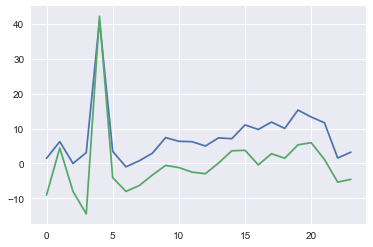

In [206]:
# Trying to find grouping of TOD to make dummy varieble
TOD_t = (sm_flights.groupby('TOD_temp')
 .agg({'Delay_Dep': 'mean','Delay_Arr':'mean','Flight#':'count','Airline':'nunique'})
         )

print(TOD_t)

plt.plot(TOD_t.index,TOD_t[['Delay_Dep','Delay_Arr']])

# Deciding it's not obvious enough on how to group
# Keeping these values as 

In [212]:
TOD_dict = dict(zip((sm_flights.groupby('TOD_temp')
 .agg({'Delay_Dep': 'mean','Delay_Arr':'mean','Flight#':'count','Airline':'nunique'})
         .sort_values('Delay_Arr')).index, range(24)))

{0: 1,
 1: 20,
 2: 2,
 3: 0,
 4: 23,
 5: 7,
 6: 3,
 7: 4,
 8: 8,
 9: 12,
 10: 11,
 11: 10,
 12: 9,
 13: 14,
 14: 18,
 15: 19,
 16: 13,
 17: 17,
 18: 16,
 19: 21,
 20: 22,
 21: 15,
 22: 5,
 23: 6}

In [213]:
sm_flights['TOD_tree'] = (sm_flights.TOD_temp.map(TOD_dict)
                                   .fillna(0))

In [214]:
sm_flights.head()

,Flight#,Taxi(min),Taxi_Arr(min),Speed(mph),Altitute(ft),Act_Dist(mi),Sch_Dist(mi),Act_Dur,Sch_Dur,Dep_Hr,...,Airline_Avg_Delay,Mon,Tue,Wed,Thu,Fri,Sat,DOW_avg_delay,TOD_temp,TOD_tree
0,N2437,NaN,NaN,587.0,45000.0,1565.0,1662.0,153.0,151.0,16.000000,...,0.0,0,0,1,0,0,0,1,16,0
1,UAL1450,17.0,24.0,517.0,37000.0,1833.0,1844.0,245.0,254.0,9.383333,...,2.0,0,0,0,0,1,0,4,9,0
2,UAL1450,25.0,11.0,519.0,37000.0,1846.0,1788.0,241.0,254.0,9.500000,...,2.0,0,0,0,1,0,0,2,9,0
3,UAL1450,15.0,15.0,521.0,35000.0,1900.0,1892.0,236.0,254.0,9.566667,...,2.0,0,0,1,0,0,0,1,9,0
4,UAL1450,16.0,10.0,520.0,35000.0,1865.0,1743.0,230.0,254.0,9.150000,...,2.0,0,1,0,0,0,0,6,9,0


In [215]:
sm_flights.sort_values(['Flight#','ORI_rank','DES_rank']).reset_index().head()


,index,Flight#,Taxi(min),Taxi_Arr(min),Speed(mph),Altitute(ft),Act_Dist(mi),Sch_Dist(mi),Act_Dur,Sch_Dur,...,Airline_Avg_Delay,Mon,Tue,Wed,Thu,Fri,Sat,DOW_avg_delay,TOD_temp,TOD_tree
0,11383,AAL1,23.0,26.0,542.0,34000.0,2571.0,2537.0,391.0,382.0,...,3.0,0,0,0,0,1,0,4,8,0
1,11384,AAL1,21.0,26.0,541.0,30000.0,2501.0,2503.0,384.0,382.0,...,3.0,0,0,0,1,0,0,2,8,0
2,11385,AAL1,22.0,12.0,531.0,30000.0,2496.0,2510.0,371.0,382.0,...,3.0,0,0,1,0,0,0,1,8,0
3,11386,AAL1,17.0,33.0,532.0,32000.0,2490.0,2490.0,384.0,382.0,...,3.0,0,1,0,0,0,0,6,8,0
4,11387,AAL1,20.0,7.0,521.0,34000.0,2572.0,2560.0,349.0,382.0,...,3.0,1,0,0,0,0,0,5,8,0


In [216]:
sm_flights[['Speed(mph)', 'Altitute(ft)']] = sm_flights[['Speed(mph)','Altitute(ft)']].fillna(method='ffill')

In [217]:
mean_Taxi = sm_flights['Taxi(min)'].mean()

In [218]:
mean_Taxi_Arr = sm_flights['Taxi_Arr(min)'].mean()

In [219]:
sm_flights['Taxi(min)']=sm_flights['Taxi(min)'].fillna(mean_Taxi)
sm_flights['Taxi_Arr(min)']=sm_flights['Taxi_Arr(min)'].fillna(mean_Taxi_Arr)

In [220]:
sm_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12188 entries, 0 to 12198
Data columns (total 32 columns):
Flight#              12188 non-null object
Taxi(min)            12188 non-null float64
Taxi_Arr(min)        12188 non-null float64
Speed(mph)           12188 non-null float64
Altitute(ft)         12188 non-null float64
Act_Dist(mi)         12188 non-null float64
Sch_Dist(mi)         12188 non-null float64
Act_Dur              12188 non-null float64
Sch_Dur              12188 non-null float64
Dep_Hr               12188 non-null float64
DOW                  12188 non-null int64
ORI_rank             12188 non-null int64
DES_rank             12188 non-null int64
Delay_Dep            12188 non-null float64
Delay_Arr            12188 non-null float64
Airline              12188 non-null object
AAL                  12188 non-null uint8
DAL                  12188 non-null uint8
UAL                  12188 non-null uint8
SWA                  12188 non-null uint8
JBU                  12188 

In [221]:
sm_flights.describe()

,Taxi(min),Taxi_Arr(min),Speed(mph),Altitute(ft),Act_Dist(mi),Sch_Dist(mi),Act_Dur,Sch_Dur,Dep_Hr,DOW,...,Airline_Avg_Delay,Mon,Tue,Wed,Thu,Fri,Sat,DOW_avg_delay,TOD_temp,TOD_tree
count,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,...,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.0
mean,18.761282,9.222338,518.491549,33591.606498,1166.077863,1178.122251,171.535199,179.246390,13.134148,2.683049,...,2.039465,0.141204,0.163439,0.171234,0.179849,0.179357,0.069330,3.030604,12.695110,0.0
std,7.711356,5.683362,27.179835,4656.586739,663.421456,657.211750,80.566229,80.614926,4.883998,1.820054,...,1.675878,0.348247,0.369781,0.376729,0.384077,0.383666,0.254026,2.021294,4.850696,0.0
min,1.000000,1.000000,71.000000,6000.000000,84.000000,87.000000,-10.000000,-6.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,14.000000,6.000000,514.000000,32000.000000,700.000000,715.000000,115.000000,121.000000,9.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.0
50%,17.000000,8.000000,522.000000,35000.000000,1008.000000,1022.000000,156.000000,162.000000,13.000000,3.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,0.0
75%,22.000000,11.000000,529.000000,36000.000000,1571.250000,1582.250000,220.000000,229.000000,17.000000,4.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,17.000000,0.0
max,59.000000,59.000000,606.000000,45000.000000,5599.000000,2987.000000,1084.000000,405.000000,23.983333,6.000000,...,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,23.000000,0.0


In [222]:
sm_flights.to_csv('sm_flights.csv')